In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(data.shape)
data = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
print(data.shape)

(768, 9)
(724, 9)


<AxesSubplot:xlabel='Outcome', ylabel='count'>

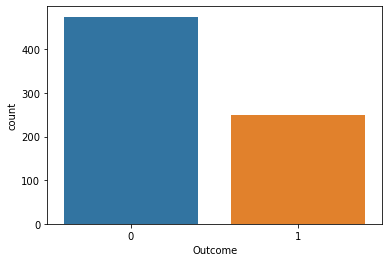

In [5]:
import seaborn as sns
sns.countplot(x='Outcome',data=data)

In [6]:

data.isnull().values.any()


False

In [7]:

data.shape

(724, 9)

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
Diabetes Pedigree Function,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [9]:
X = data.iloc[:,:-1]
y = data['Outcome']

<AxesSubplot:>

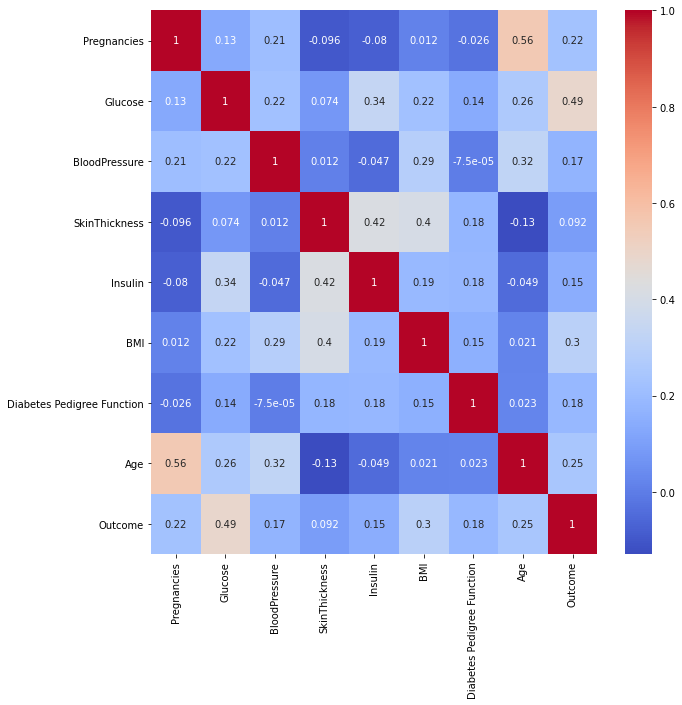

In [10]:
#Show the counts of observations in each categorical bin using bars.
import seaborn as sns
diabetes_corelation=data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(diabetes_corelation,annot=True,cmap="coolwarm")

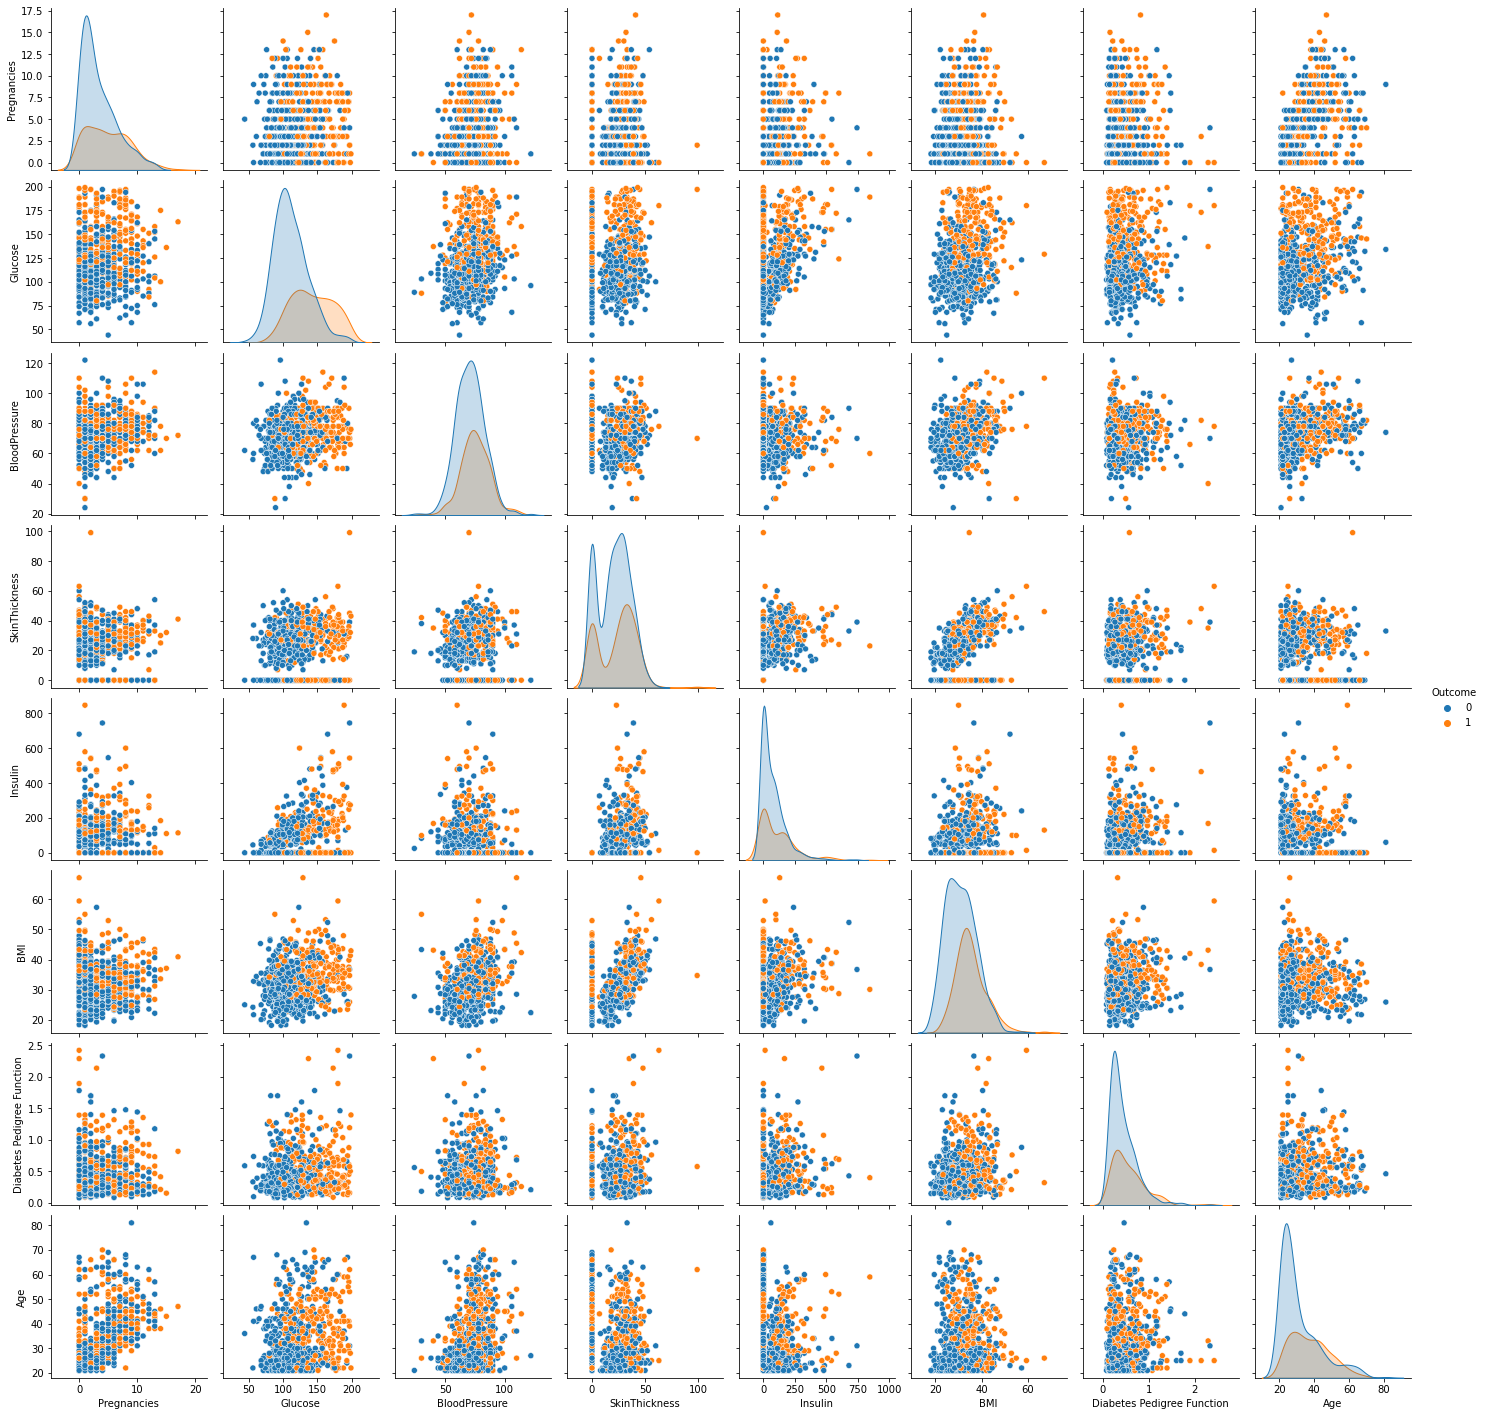

In [11]:
sns.pairplot(data, hue="Outcome")

In [12]:
print(X.shape,y.shape)

(724, 8) (724,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 30)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (579, 8) (579,)
Test Set:  (145, 8) (145,)


# RANDOM FOREST CLASSIFIER

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model = RandomForestClassifier(random_state=40)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, model.predict(X_test))
cm

array([[75, 20],
       [22, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

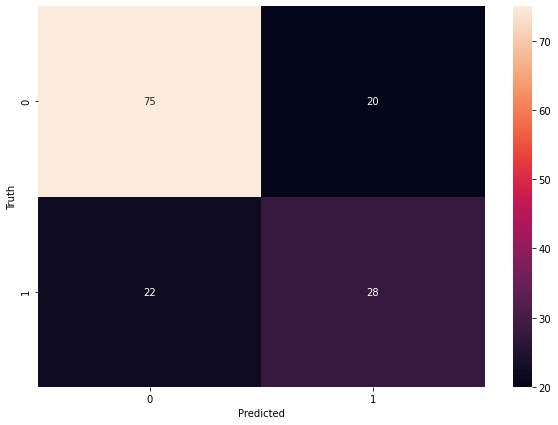

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 71.03


# SUPPORT VECTOR CLASSIFIER

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
print("Accuarcy is :",accuracy_score(y_test,y_pred_scv)*100)

Accuarcy is : 74.48275862068967


In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, svc_classifier.predict(X_test))
cm

array([[87,  8],
       [29, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

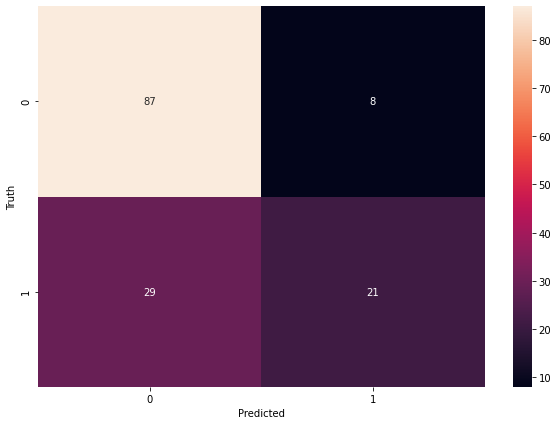

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 90,max_iter=7600,penalty = 'none')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Accuarcy is :",accuracy_score(y_test,y_pred_lr)*100)

Accuarcy is : 77.24137931034483


In [22]:
cm=confusion_matrix(y_test, lr_classifier.predict(X_test))
print(cm)

[[86  9]
 [24 26]]


Text(69.0, 0.5, 'Truth')

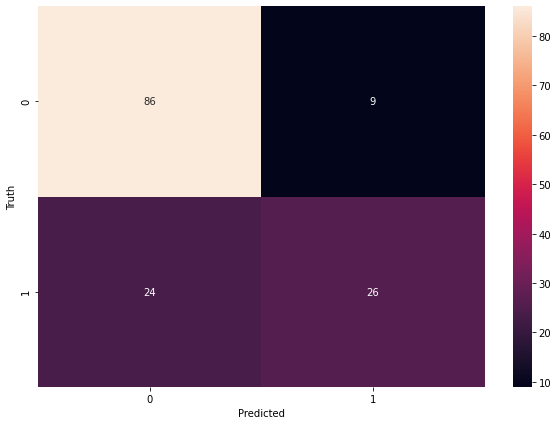

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print("Accuarcy is :",accuracy_score(y_test,y_pred_knn)*100)

Accuarcy is : 71.72413793103448


Text(69.0, 0.5, 'Truth')

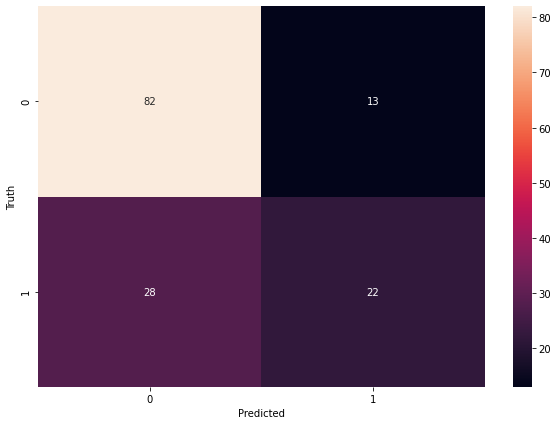

In [25]:
cm=confusion_matrix(y_test, knn_classifier.predict(X_test))
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# NAIVE BAYES

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Accuarcy is :",accuracy_score(y_test,y_pred_nb)*100)

Accuarcy is : 73.10344827586206


In [27]:
cm=confusion_matrix(y_test, nb_classifier.predict(X_test))
print(cm)


[[76 19]
 [20 30]]


Text(69.0, 0.5, 'Truth')

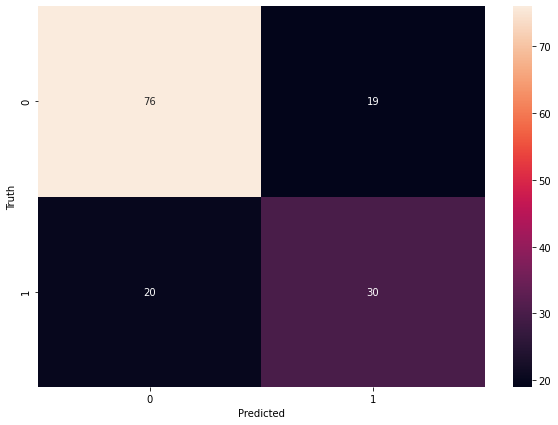

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# XGBOOST

In [29]:

from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
print("Accuarcy is :",accuracy_score(y_test,y_pred_xgb)*100)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuarcy is : 67.58620689655173


In [30]:
cm=confusion_matrix(y_test, xgb_classifier.predict(X_test))
print(cm)


[[70 25]
 [22 28]]


Text(69.0, 0.5, 'Truth')

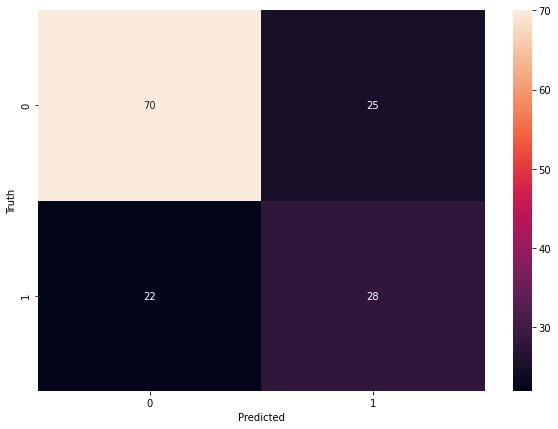

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
import pickle
pickle.dump(lr_classifier, open('diabetes.pkl', 'wb'))

# APPLYING HYPERPARAMETER TUNING

In [33]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import linear_model
lr_classifier=linear_model.LogisticRegression(C=1, penalty='l2', solver='liblinear')
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=50)

In [34]:
from scipy.stats import uniform
penalty = ['l1', 'l2']

C = uniform(loc=0, scale=4)

hyperparameters = dict(C=C, penalty=penalty)

In [35]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [36]:
clf = RandomizedSearchCV(lr_classifier, hyperparameters, random_state=10, n_iter=100, cv=skfold, verbose=3, n_jobs=-1)

In [37]:
from datetime import datetime
start_time = timer(None) 
best_model=clf.fit(X,y)
timer(start_time)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits

 Time taken: 0 hours 0 minutes and 31.69 seconds.


In [38]:
params = clf.best_params_
score = clf.best_score_
print(params)
print(score)

{'C': 3.085282573066984, 'penalty': 'l1'}
0.7765714285714285


In [39]:
clf.best_params_

{'C': 3.085282573066984, 'penalty': 'l1'}

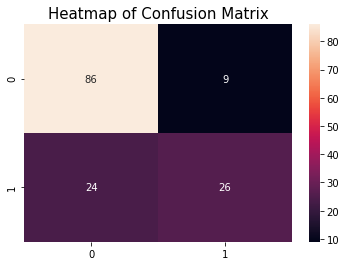

In [40]:
from sklearn.metrics import confusion_matrix
lr_classifier=linear_model.LogisticRegression(C= 3.085282573066984, penalty='l2',max_iter=7600)
lr_classifier.fit(X_train, y_train)
y_pred= lr_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()